In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('final dataset.csv')

In [3]:
data = data.drop_duplicates()

In [4]:
data.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1048545    False
1048546    False
1048547    False
1048548    False
1048549    False
1048550    False
1048551    False
1048552    False
1048553    False
1048554    False
1048555    False
1048556    False
1048557    False
1048558    False
1048559    False
1048560    False
1048561    False
1048562    False
1048563    False
1048564    False
1048565    False
1048566    False
1048567    False
1048568    False
1048569    False
1048570    False
1048571    False
1048572    Fal

In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,5] = le.fit_transform(x[:,5])
x[:,7] = le.fit_transform(x[:,7])
x[:,12] = le.fit_transform(x[:,12])
x[:,13] = le.fit_transform(x[:,13])
y = le.fit_transform(y)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
x= scaler.fit_transform(x)

/home/turjoy/anaconda3/envs/Arafat/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size = 0.2, random_state = 100) 

In [11]:
from sklearn.metrics import classification_report

In [12]:
from sklearn.linear_model import LogisticRegression
Logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',max_iter=1000).fit(x_train, y_train)
prediction = Logistic_regression.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
import pylab as pl

[[   359      0     21      0      0]
 [     5 187820     23      0      0]
 [     0     40    567      0      0]
 [     6    800     33    404      0]
 [     0   1899      0      0  17738]]


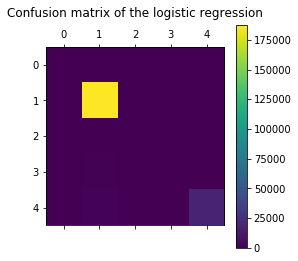

In [17]:
y_expect = y_test
cmn = confusion_matrix(y_expect, prediction)
pl.matshow(cmn)
print (cmn)
pl.title('Confusion matrix of the logistic regression\n')
pl.colorbar()
pl.show()

In [18]:
from sklearn.metrics import accuracy_score
print(classification_report(y_expect,prediction))
print (accuracy_score(y_expect, prediction)*100)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       380
           1       0.99      1.00      0.99    187848
           2       0.88      0.93      0.91       607
           3       1.00      0.33      0.49      1243
           4       1.00      0.90      0.95     19637

   micro avg       0.99      0.99      0.99    209715
   macro avg       0.97      0.82      0.86    209715
weighted avg       0.99      0.99      0.99    209715

98.65198006818778


In [19]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [20]:
classifier = LogisticRegression(random_state = 100,solver='lbfgs', multi_class='multinomial',max_iter=1000) 
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=100, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

[[     0    380      0      0      0]
 [     0 187848      0      0      0]
 [     0    607      0      0      0]
 [     0   1243      0      0      0]
 [     0  19637      0      0      0]]


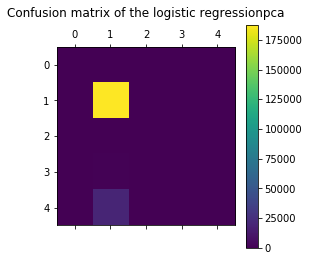

In [21]:
y_pred = classifier.predict(x_test) 
cmn = confusion_matrix(y_test, y_pred) 
pl.matshow(cmn)
print (cmn)
pl.title('Confusion matrix of the logistic regressionpca\n')
pl.colorbar()
pl.show()

In [22]:
print(classification_report(y_test,y_pred))
print (accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       380
           1       0.90      1.00      0.94    187848
           2       0.00      0.00      0.00       607
           3       0.00      0.00      0.00      1243
           4       0.00      0.00      0.00     19637

   micro avg       0.90      0.90      0.90    209715
   macro avg       0.18      0.20      0.19    209715
weighted avg       0.80      0.90      0.85    209715

89.57299191760247


/home/turjoy/anaconda3/envs/Arafat/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from LVQClassifier import LVQClassifier as LVQ

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size = 0.2, random_state = 100) 

In [27]:
clf = LVQ(n_components=27,epochs=10,alpha=0.5,
          initial_state='Uniform',LVQ2=True)
clf.fit(x_train,y_train)

[[   288      0      0     92      0]
 [  1818 175284      0   7999   2747]
 [   568     37      0      2      0]
 [    65    735      0    433     10]
 [     6   1778      0     90  17763]]


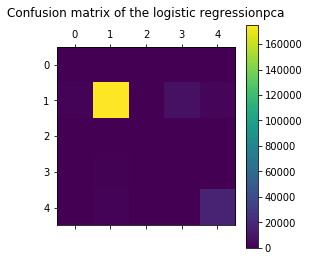

In [28]:
y_pred = clf.predict(x_test) 
cmn = confusion_matrix(y_test, y_pred) 
pl.matshow(cmn)
print (cmn)
pl.title('Confusion matrix of the logistic regressionpca\n')
pl.colorbar()
pl.show()

In [29]:
print(classification_report(y_test,y_pred))
print (accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.10      0.76      0.18       380
           1       0.99      0.93      0.96    187848
           2       0.00      0.00      0.00       607
           3       0.05      0.35      0.09      1243
           4       0.87      0.90      0.88     19637

   micro avg       0.92      0.92      0.92    209715
   macro avg       0.40      0.59      0.42    209715
weighted avg       0.96      0.92      0.94    209715

92.39587058627184


In [30]:
import susi

In [31]:
som = susi.SOMClassifier(
        n_rows=40,
        n_columns=40,
        n_iter_unsupervised=100,
        n_iter_supervised=100,
        learning_rate_start=0.5,
        learning_rate_end=0.05,
        # do_class_weighting=True,
        random_state=100)
som.fit(x_train, y_train)
y_pred = som.predict(x_test)
print(som.score(x_test, y_test))

0.3587392413513578


[[     0     57    255      0     68]
 [  2345  59714 118504      0   7285]
 [     0     14    446      0    147]
 [     6    256    690      0    291]
 [    21    635   3908      0  15073]]


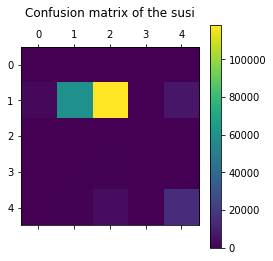

In [32]:
cm = confusion_matrix(y_test, y_pred) 
pl.matshow(cm)
print (cm)
pl.title('Confusion matrix of the susi\n')
pl.colorbar()
pl.show()


In [33]:
print(classification_report(y_test,y_pred))
print (accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       380
           1       0.98      0.32      0.48    187848
           2       0.00      0.73      0.01       607
           3       0.00      0.00      0.00      1243
           4       0.66      0.77      0.71     19637

   micro avg       0.36      0.36      0.36    209715
   macro avg       0.33      0.36      0.24    209715
weighted avg       0.94      0.36      0.50    209715

35.87392413513578


/home/turjoy/anaconda3/envs/Arafat/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
